# Project Group 12 

**Members:** 

<small>Inés Blanes (6536158)</small>

<small>Kevin Verbakel (6578616)</small>

<small>Zake Marin Domit (6551920)</small>

<small>Michiel Pater (5630851)</small>

<small>Emeline Neuteboom (5452570)</small>

# Introduction

<small>SAIL Amsterdam is a large 5-day maritime festival held every five years. The event attracts over 10,000 ships and more than 2.3 million visitors. Managing crowds of this size requires continuous crowd management to prevent issues such as congestion, bottlenecks and overcrowding at specific locations. The SAIL event spans across the IJ river as it goes through Amsterdam. Specifically where the river flows by the main station and its surroundings. Neighbouring areas are used to host related events to SAIL. Thus, SAIL’s interest areas are divided as seen in the figure below.</small>


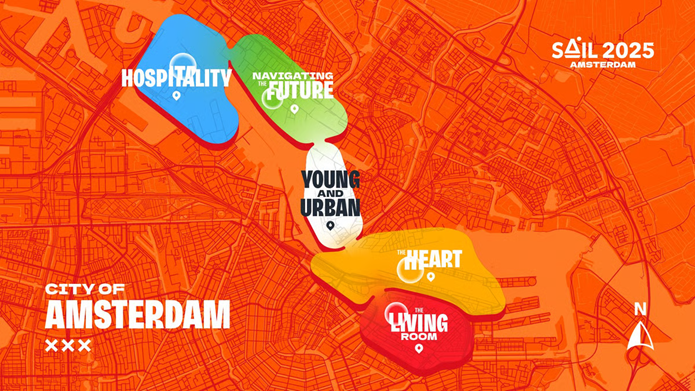

<small>The blue area (i.e. ‘Hospitality’) is dedicated to sponsor lounges, business hosting, and premium guest activities. The green area (i.e. ‘Navigating the Future ') aims to showcase maritime technology, host exhibits and talks, future shipping, sustainability, etc. The white area (i.e. ‘Young and Urban) hosts a younger-audience program with music, interactive media, urban culture, and public engagement art. The orange area (i.e. ‘The Heart’) is the core of the event, visitors can walk along the docked ships, board vessels, and engage with ship exhibitions. Lastly, the red area (i.e. ‘The Living Room’) has a more relaxed, small scale, and laid-back program with lounges, installations and quieter performances.

There already are a number of sensors located at the event to support crowd managers. However, a user-friendly platform such as a dashboard, has not been made yet. This project focuses on developing a dashboard that helps crowd managers monitoring crowd flows and predicting potential issues for taking action on time.

This report outlines the project’s research questions, presents the data used to develop the dashboard, the steps taken in the developing and integration of the dashboard, and the results and conclusions.</small>

# Research Questions

<small>**Main Question**</small>

<small>For this question, the focus lies on developing a data-driven dashboard that supports crowd managers during SAIL 2025. The goal is to identify how real-time and predictive information can be presented in a clear, actionable way to enhance decision-making and crowd safety:</small>

<small><p style="text-align:center;">*How can an informative dashboard be designed to efficiently inform crowd managers about the current and predicted busyness of SAIL 2025?*</p></small>

<small>**Sub-Questions**</small>

<small>Three subquestions were formulated in order to answer the main research question and develop a dashboard:</small>

<small><p style="text-align:center;">*1. What specific information do crowd managers need to make timely and effective crowd-management decisions?*</p></small>

<small>This question aims to determine the key data requirements of crowd managers, such as real-time density levels, flow directions, and potential congestion points. Understanding these needs ensures that the dashboard provides relevant and practical insights for operational decision-making.</small>

<small><p style="text-align:center;">*2. Which algorithm is most suitable for predicting crowd busyness based on real-time and historical data?*</p></small>

<small>This question explores various predictive algorithms to identify the most accurate and efficient approach for forecasting crowd levels. The focus is on integrating both historical trends and live sensor data to anticipate changes in busyness.</small>

<small><p style="text-align:center;">*3. Which visualization techniques best communicate crowd busyness effectively in a Streamlit interface?*</p></small>

<small>This question investigates how visual elements, such as heatmaps, time graphs, and alert indicators, can be designed to clearly and intuitively show the current and predicted crowd conditions within a Streamlit dashboard.</small>

# Data

<small>The data used in this project was provided by the university. Amongst the datasets, the ones containing sensor location and crowd flows were used as input for the dashboard. The sensor location is shown in the picture below:</small>

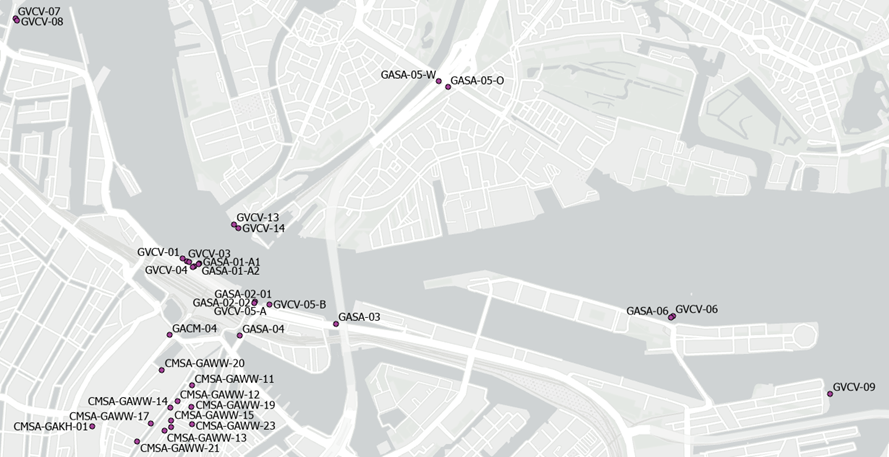

<small>The sensor location dataset contains the exact coordinates of each of the sensors as well as the effective width in which they operate. When it comes to the crowd flow dataset, it records counts every three minutes. In this dataset, for each of the sensors, there are two columns with crowd flows, each representing a different direction. Furthermore, this dataset also specifies the day of the week, the month, and whether it is a weekend or not. In order to get a grasp of what the crowd flows dataset looks like, the following plot representing average flow is assembled where each bar in the plot represents one sensor (both directions combined), showing the mean number of people detected every 3 minutes:</small>

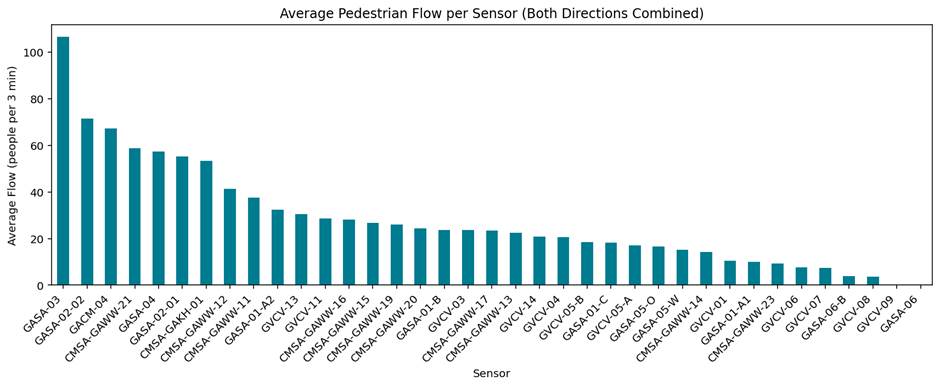

# Preliminary Design

<small>Based on the goal of the dashboard and the available datasets, the scope can be defined. Since the dashboard will only be provided to crowd managers and will not be commercialised, a login page is not needed. Thus, the end result will have a map displaying the location of the sensors and live crowd flow around them. Furthermore, forecasts will also be shown, warning the managers about potentially unsafe situations in the nearby future. A safety tab will be added in case the system fails, so that raw live counts can still be checked.</small>

# Algortihm and Visualization

<small>The Forecasting of busyness of sensors was attempted through the SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) package from the statsmodels library. It’s base is the ARIMA model (AR for AutoRegression - taking past values, in linear regression, to predict current/future ones; MA for Moving Average - taking past (statistical) error values to predict the next ones; and I for Integration - differentiating a time series enough, it becomes stationary, so the model only needs to be concerned with stationary series.

Expanding into the SARIMA model, we include the possibility of Seasonality. In our case, we have 24-hour seasonality, with bigger peaks during the afternoon and much less movement during the night. The X at the and stands for eXogenous variables, giving the SARIMAX the ability to detect patterns in weekends, day vs night, and the usual time-series detailing of ARIMA.

However, SARIMAX models tend to be very memory-heavy. Each of the sensors’ models occupied more than 1Gb of memory, rendering the upload of such a service unmanageable. Thus, we pivoted towards a much lighter XGBoost model. XGBoost operates as an ensemble of decision trees with sequential error-compensation, making it effective for capturing complex temporal patterns in sensor data. Our training process begins by aggregating 3-minute sensor readings into 15-minute intervals. Lag intervals were used to predict seasonality (day vs night). The model simultaneously forecasts all 74 sensors using a multi-output approach, where separate decision trees are trained for each sensor while sharing the same rich feature set. The MAE’s gathered through XGBoost were inferior to those with SARIMAX. XGBoost needs sequential, recursive forecasting, where the forecasting of the second step requires the first step’s forecast as input. This can have consequences of degeneration.

In this project, streamlit is used for creating a dashboard to visualise the busyness of crowds at the SAIL event. Multiple visualisation techniques were used to show the real-time and prediction crowdedness at the sensor locations. First, an interactive map is integrated, using the python library “Folium”. The sensors are displayed as arrows, corresponding to the direction of the pedestrian movement, and are colour coded according to the (predicted) amount of people and the estimated maximum capacity. If one hovers over a sensor, additional information is being shown. When clicking on the sensor, a graph appears on the right side, giving information about the predicted amount of people at a certain time. Both movement directions are represented in this graph. 

Secondly, a slider is implemented, with which a specific time can be selected on a certain day. The time on the slider can also be set to be in the future, to analyse the crowdiness at a certain point of day. By looking at the colours of the sensors at this certain timestep, the predicted crowdiness of the SAIL event is easy to analyse.

Another implemented feature is the warning system, which automatically identifies sensors, who almost reach their estimated maximum capacity. This warning system is shown in a table, sorted on time.


It is also possible to have a day overview of one specific sensor. The projected graph shows the crowdiness of a specific sensor for the whole day for both directions, represented by two colored lines.</small>

# Final Dashboard

<small>This is the final Dashboard. It includes three main tabs; “Map”, “Day overview per sensor” and “Raw sensor data”. In this section, per tab, each function of the dashboard is explained.</small>

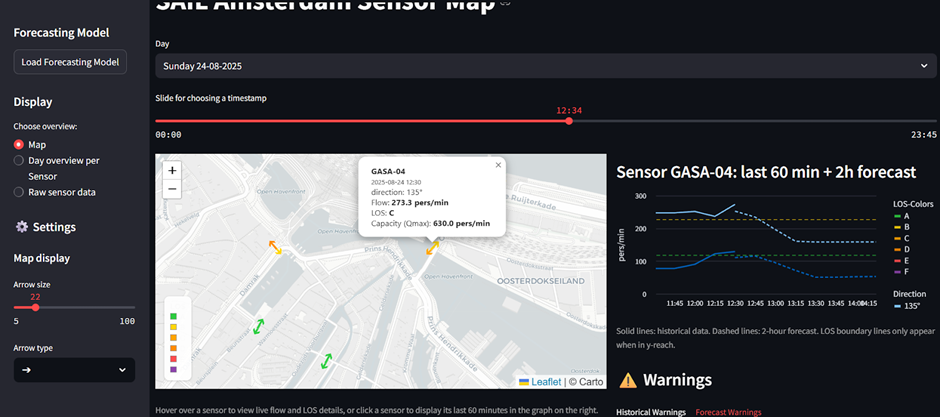

<small>*Tab 1: Map*

In this tab, the crowd manager can explore the overall flow situation across the SAIL area.At the top, a dropdown menu allows the user to select the desired day of SAIL. Below that, a time slider can be moved from 00:00 to 23:59, representing the chosen day. In the example below, a peak moment is selected: Sunday at 16:35. 

On the map, each sensor is displayed with two directional arrows, representing the measured flow in both directions. The colour of each arrow corresponds to the Level of Service (LOS), for that sensor at that specific time. Each sensor has its own LOS capacity limits, stored in a data file. A color legend on the map indicates the meaning of each LOS color.

When hovering over an arrow, a popup appears with detailed information: sensor name, date and time, direction of the arrow, the current flow, the matching LOS number, and the maximum capacity. When the arrow is clicked, the dashboard displays the past 60 minutes of data for that sensor on the right-hand side. This small graph shows the flow in both directions (light and dark blue). If the measured flow exceeds one of the LOS limits, the corresponding LOS line appears in the chart.

For example, in the figure below, the flow at 16:35 exceeds LOS C. Since the value is bigger than the limit needed for LOS D, the arrow is painted orange. In the “Display” sidebar on the left, two settings of the map can be adjusted. These are the arrow size and type. The arrow size can be set from 5 to 100 pixels, and the user can choose between 6 arrow types. This way, a user can adjust the visualisation of the map according to their preferences.</small>

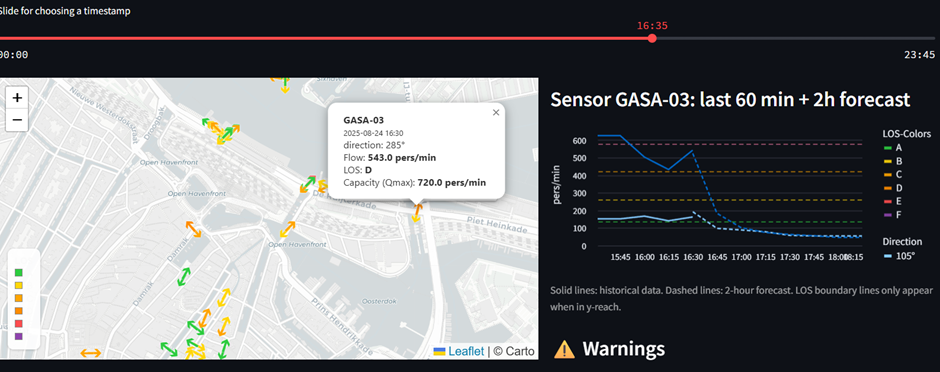

<small>At the top left, there’s a “Load Forecasting Model” button. All prints in this report are after the model has been loaded. The model allows for 2 hours of forecast after the selected time (dashed lines). The forecasting model was carefully validated to ensure no data leakage occurred. The forecasts shown for past timestamps are for demonstration purposes only. When the model is loaded, changing timestamps takes longer, because the whole Warning section (thus all sensors’ forecasts) must be recalculated.

At the bottom right, there is also a “Warnings” section. This table lists all sensors that have reached LOS C or higher up to the current time selected on the slider. The list automatically sorts the newest warnings on top, so scrolling is not necessary. This allows the crowd manager to see the most recent warnings immediately.  There is also a “Forecasted Warnings” sheet, which has the same properties, but shows possible problems for the future.
</small>

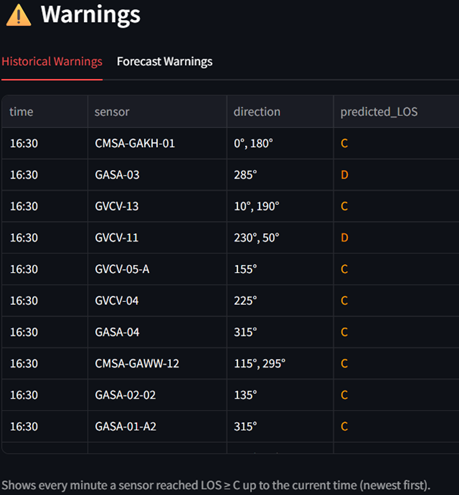
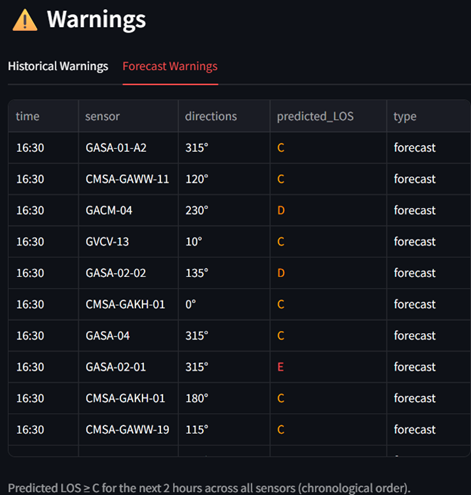

<small>*Tab 2: Day overview per Sensor*

If a crowd manager wants to view the flow of a specific sensor over an entire day, this can be done under the “Day overview per sensor” tab. This tab provides a larger version of the 60-minute graph shown in the “Map” tab. The user can select both the day and one of the 36 sensors from the dropdown menus. The graph then displays the full 24=hour flow trend for that sensor, including all LOS lines. The same peak at 16:36 (as seen in the “Map” tab) can be identified here as well, but now in the context of the whole day.</small>

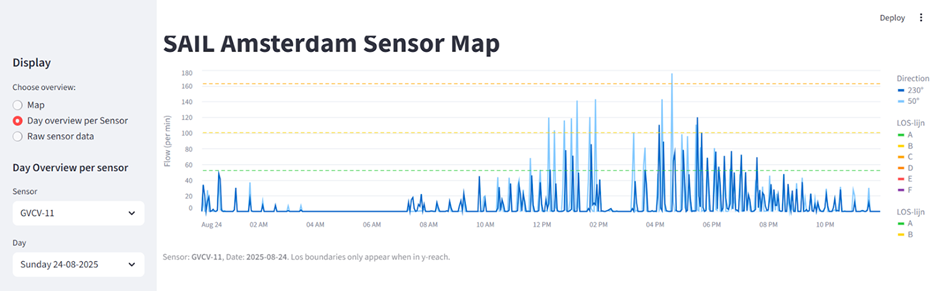

<small>*Tab 3: Raw sensor data*

The “Raw sensor data” tab allows the user to inspect the original input data from the sensors. This can be useful if an error occurs, or for data validation. For example, a crowd manager can select the same sensor (GVCV-11) and the same day as in previous examples. By scrolling down to 16:36, the manager can directly view the unprocessed sensor data, which are used as the input for all calculations in the other tabs.</small>

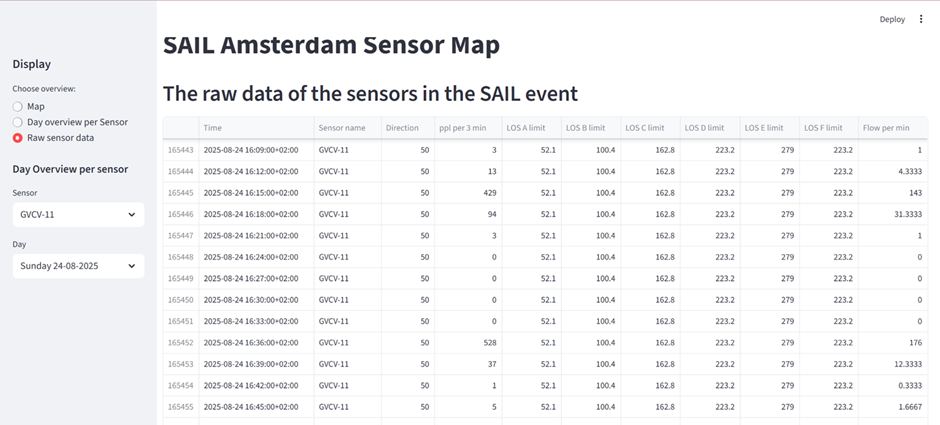

# Connection to Research Questions

<small>*Sub-Question 1: What specific information do crowd managers need to make timely and effective crowd-management decisions?*</small>

<small>Based on the provided data, crowd managers need real-time insights into pedestrian flow, density, and congestion points. The dashboard provides for these needs through live data visualizations (i.e., arrows indicating the direction of the flow color-coded according to Levels of Service). Warning and alerts are automatically generated when crowd levels approach capacity, thus supporting decision-making. The ‘Map’ tab integrates all visual elements, allowing managers to quickly identify potentially dangerous situations and their location. The ‘Day Overview per Sensor’ tab adds temporal context, helping managers recognize recurring crowd patterns. Lastly, the ‘Raw Sensor Data’ tab offers backup access to unprocessed data, in case the system were to fail.</small>

<small>*Sub-Question 2: Which algorithm is most suitable for predicting crowd busyness based on real-time and historical data?*</small>

<small>Initial testing used SARIMAX, chosen for its ability to handle seasonality and other factors such as weekends and day/night patterns. However, due to memory limitations, SARIMAX was replaced with XGBoost, a faster and lighter model. XGBoost still produced accurate and responsive forecasts, making it more practical for real-time dashboard integration. The algorithm uses both historical crowd flow count data and time-related features to predict short-term busyness. XGBoost was then the most efficient and reliable model to integrate into the dashboard for real-time crowd forecasting.</small>

<small>*Sub-Question 3: Which visualization techniques best communicate crowd busyness effectively in a Streamlit interface?*</small>

<small>The dashboard uses a combination of interactive mapping, color-coding, and time-series charts. Folium maps show sensor locations with arrows indicating crowd flow direction and LOS-based colour scales. Interactive sliders allow users to select specific times of day and visualize both current and predicted states at the same time. Pop-ups and side graphs provide sensor-specific details without cluttering the interface. Warnings tables summarize critical information in real time. Thus, the combination of spatial (i.e., maps) and temporal (i.e., graphs) visualizations in Streamlit makes it clear and intuitive for crowd managers to interpret crowd conditions.</small>

<small>*Main Research Question: How can an informative dashboard be designed to efficiently inform crowd managers about the current and predicted busyness of SAIL 2025?*</small>

<small>By combining live and predictive analytics, the dashboard offers both situational and anticipatory insights. Relevant information such as flows, capacity, and warnings are presented through intuitive visualizations and simple navigation. The dashboard design makes it easy for crowd managers to efficiently make decisions and respond to potential overcrowding before the event occurs. The inclusion of backup raw data access ensures operational reliability in case the system fails or the algorithm produces forecasting errors. Therefore, the resulting dashboard effectively supports crowd managers by integrating real-time monitoring, predictive modelling, and user-friendly visualization, aligning fully with the project’s main objective.</small>

# Discussion and Conclusion

<small>The goal of this project was to create a dashboard that is able to inform crowd managers about the busyness of the SAIL event. At first, the scope was to only focus on ‘the heart’ of the SAIL event. However, it appeared that there were not a lot of sensors in this area in the data set. Therefore, it was decided to also use the sensors of the city centre and other parts of the SAIL area. This way, crowd managers are able to see trends in larger areas, in and around the SAIL event.

The research question and multiple subquestions were set up to effectively develop an informative dashboard. This included the type of information the crowdmanagers need, the to-be used algorithm and how this information should be visualised in the dashboard. An extensive research project was done on the needed information and the visualisation of information in course TIL4030. The results of this report were used for developing this dashboard. In short, the dashboard includes an interactive map with all the sensors and its corresponding direction, graphs showing the current and predicted crowdiness level and a table with upcoming crowded locations. 

At first, the algorithm that was used for the forecasting of the busyness was the SARIMAX package. However, when this forecasting model was implemented, it appeared that this model was too heavy in memory. Therefore, it was decided to change the algorithm to XGBoost. Nevertheless, quite accurate forecasts are produced with this final algorithm, using a lot less memory.

In conclusion, an informative dashboard was created for the crowd managers of the SAIL event. Crowd managers can use this intuitive dashboard to efficiently manage crowds and foresee overcrowdedness in the near-future. Crowd managers are able to see the predictions about future busyness of each sensor on the map. When problems might arise in this model, there is a safety tab with the raw sensor data, as a safety measure.

For further research, it is recommended to place more sensors on the SAIL event and by doing so, gather more data on the movement of crowds on the SAIL terrain. Right now, most sensors are located in the inner city and don’t represent the SAIL event. This hindered this research on developing an accurate algorithm for the next SAIL event. Nevertheless, this lack of sensors and therefore data did not have any impact on the development of the dashboard, as the dashboard’s specifications are highly usable in the case of a change of sensors on the SAIL event.
</small>

# Contribution Statement

<small>

Inés Blanes: Creation of the map, initial algorithms, writing report.

Kevin Verbakel: Raw data tab, structuring sidebar, dashboard settings, writing report.

Zake Marin Domit: Creating an algorithm, writing report.

Michiel Pater: Assist with algorithm, developing research questions, writing report.

Emeline Neuteboom: Visualisation of the dashboard, writing report.

</small>